### Gradient boosting for regression problem

In [1]:
# importing the dataset from sklearn module
from sklearn import datasets

# loading the dataset
dataset= datasets.load_diabetes()
 
# importing the pandas
import pandas as pd

# convertig the dataset into pandas dataframe
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)

# printing the head
data.head(5)


age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019908 -0.017646  
1 -0.039493 -0.068330 -0.092204  
2 -0.002592  0.002864 -0.025930  
3  0.034309  0.022692 -0.009362  
4 -0.002592 -0.031991 -0.046641

In [2]:
X, y = datasets.load_diabetes(return_X_y=True)


In [3]:
# info method
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [4]:
# merging the target variable
data['target'] = dataset.target

# heading
data.head(5)

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019908 -0.017646   151.0  
1 -0.039493 -0.068330 -0.092204    75.0  
2 -0.002592  0.002864 -0.025930   141.0  
3  0.034309  0.022692 -0.009362   206.0  
4 -0.002592 -0.031991 -0.046641   135.0

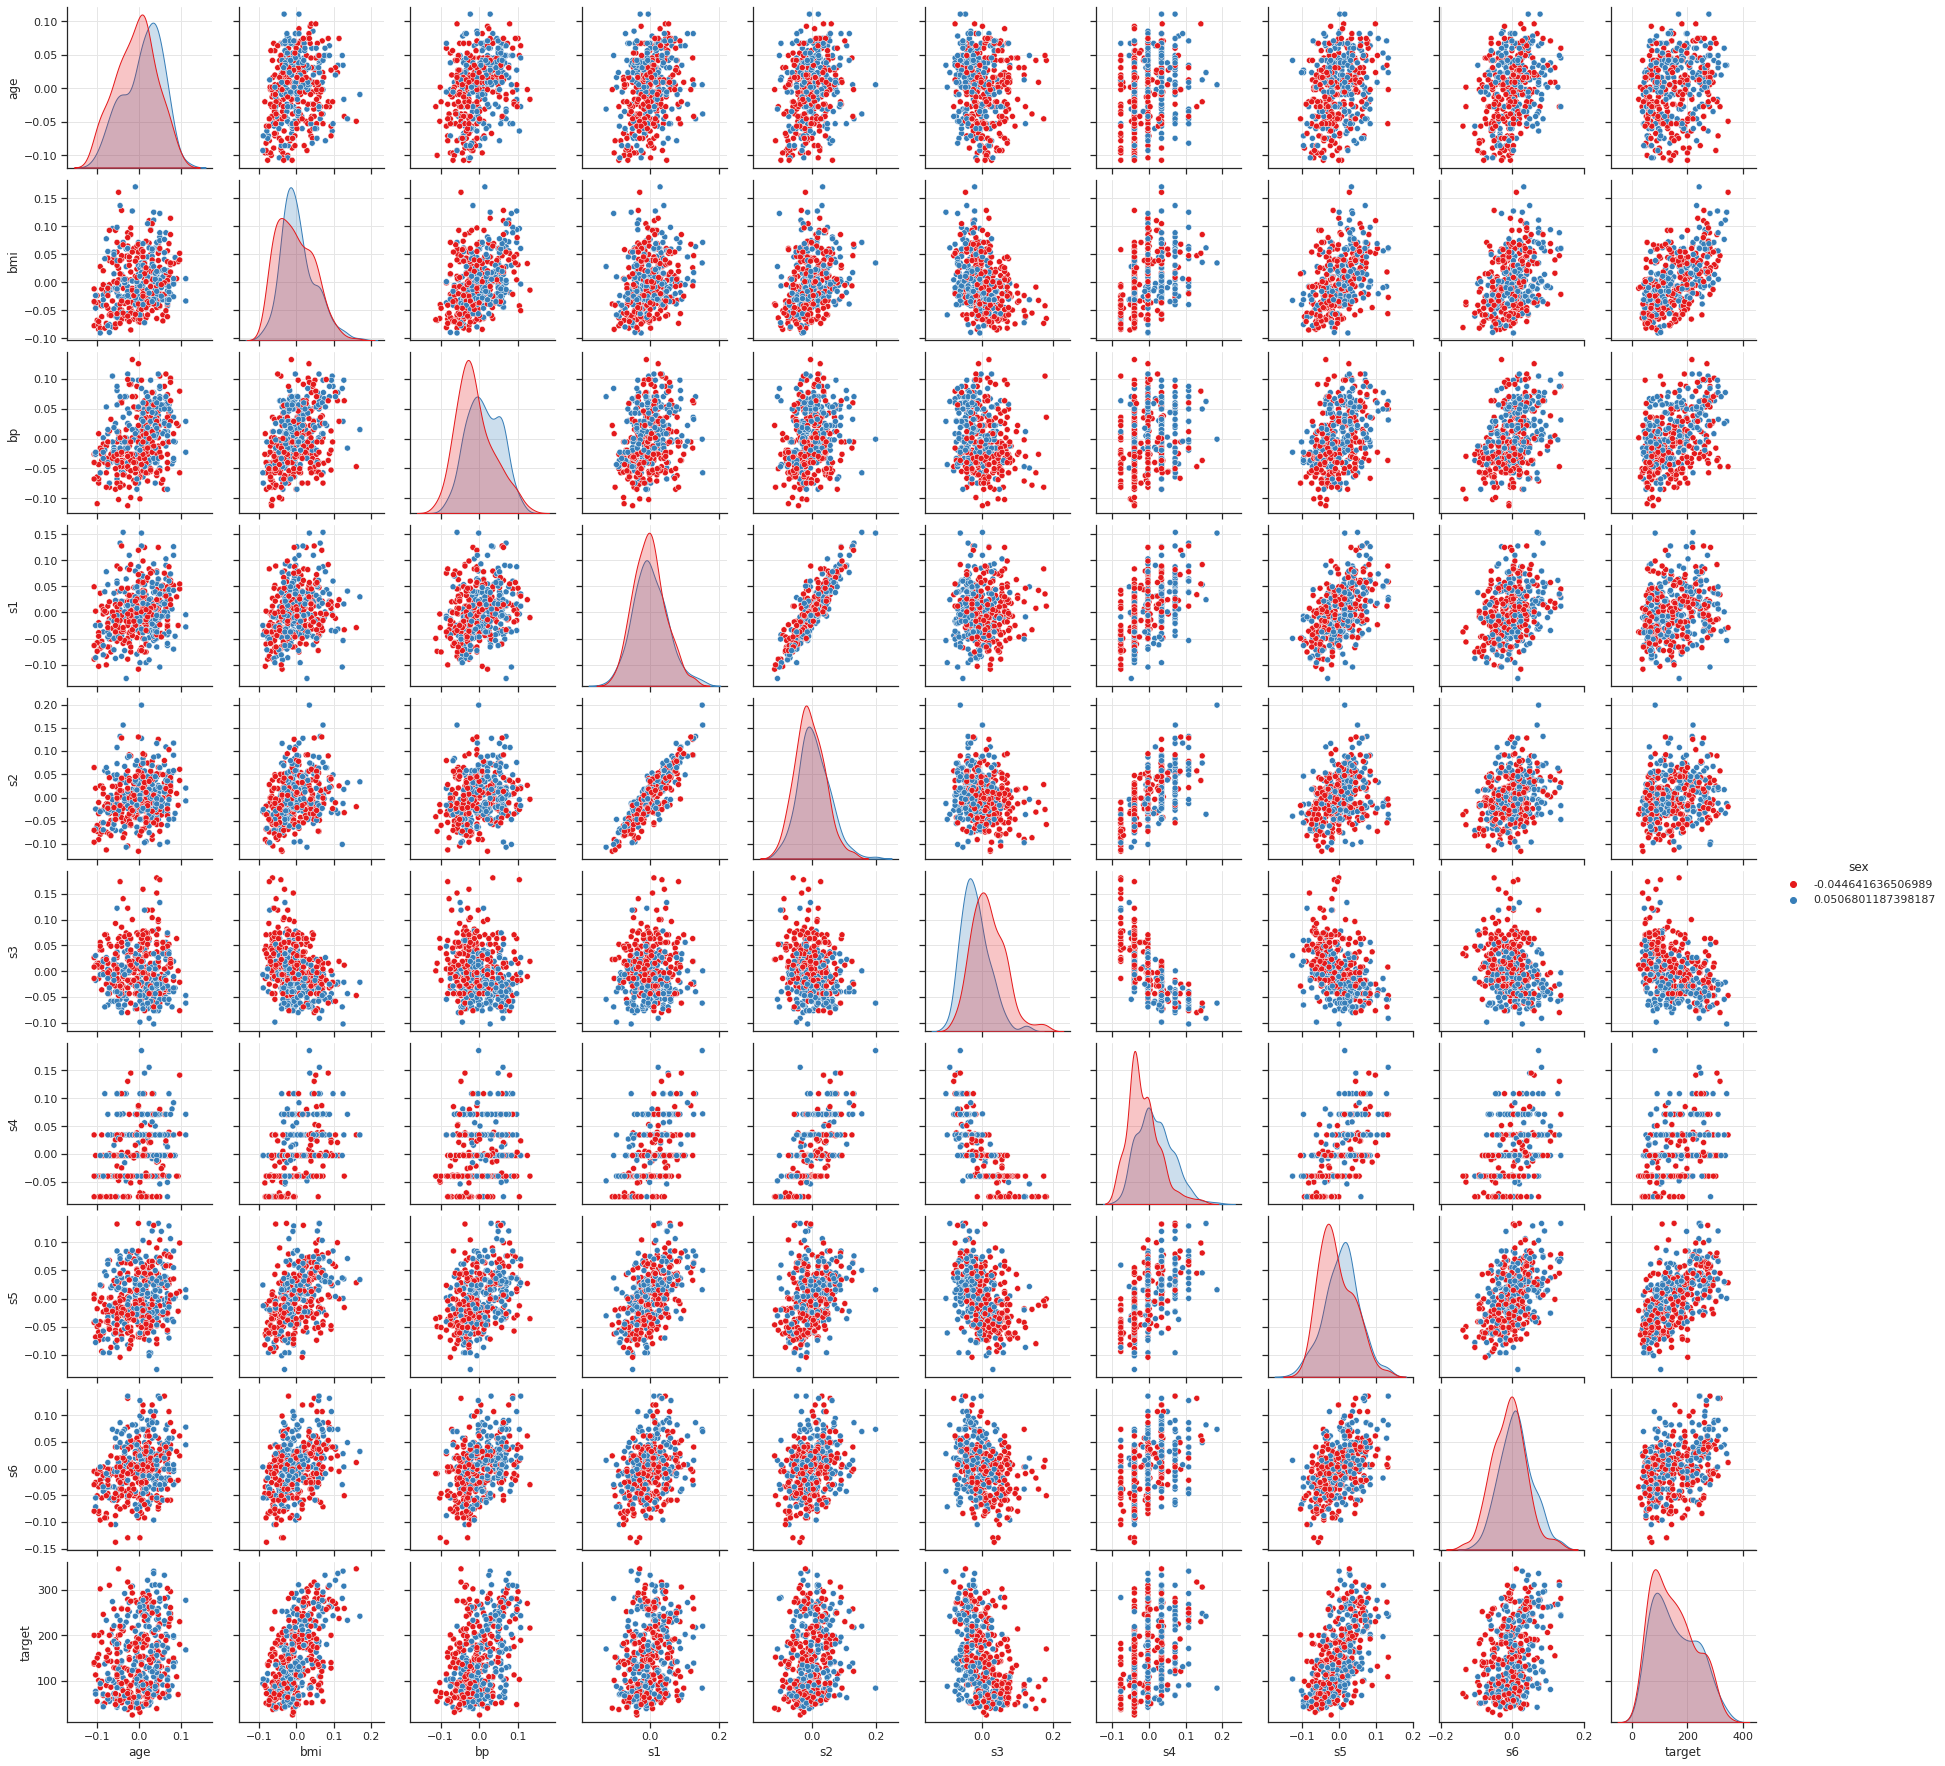

In [5]:
import seaborn as sns
sns.set()
sns.set_style("ticks", {
    'axes.grid': True,
    'grid.color': '.9',
    'grid.linestyle': u'-',
    'figure.facecolor': 'white', # axes
})
sns.set_context("notebook")

sns.pairplot(data, hue="sex", palette='Set1')

In [6]:
# splitting the data into inputs and outputs
Input, output = datasets.load_diabetes(return_X_y=True)

In [7]:
# importing the module
from sklearn.model_selection import train_test_split

# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(Input, output, test_size=0.25)

In [8]:
# Importing the Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

# training 
GB_regressor=GradientBoostingRegressor(n_estimators=10)
GB_regressor.fit(X_train,y_train)

# predicting
GB_predict=GB_regressor.predict(X_test)


In [9]:
# Importing mean_absolute_error from sklearn module
from sklearn.metrics import mean_absolute_error, r2_score

# Evaluating the model
print('MAE is :', mean_absolute_error(y_test, GB_predict))
print('R score is :', r2_score(y_test, GB_predict))


MAE is : 52.58600142563235
R score is : 0.33870661986504647


In [10]:
# importing required module
from sklearn.model_selection import GridSearchCV

# initializing the model
model=GradientBoostingRegressor()

# defining the estimators to be in range of 100
params={'n_estimators':range(1,100)}

# applying GridSearchCV
grid=GridSearchCV(estimator=model,cv=2,param_grid=params,scoring='neg_mean_squared_error')

# training the model
grid.fit(X_train,y_train)

# printing the best estimator
print("The best estimator returned by GridSearch CV is:",grid.best_estimator_)


The best estimator returned by GridSearch CV is: GradientBoostingRegressor(n_estimators=21)


In [11]:
# training 
GB_regressor=GradientBoostingRegressor(n_estimators=36)
GB_regressor.fit(X_train,y_train)

# predicting
GB_predict=GB_regressor.predict(X_test)

In [12]:
# Evaluating the model
print('MAE is :', mean_absolute_error(y_test, GB_predict))
print('R score is :', r2_score(y_test, GB_predict))

MAE is : 48.29185446295304
R score is : 0.4150260534052199


### Gradinet boosting for classification

In [13]:
# importing the dataset
dataset = datasets.load_iris()

# convertig the dataset into pandas dataframe
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)

# printing the independent column
data.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [14]:
# merging the target variable
data['target'] = dataset.target

# printing
data.head(5)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [15]:

#importing the required modules
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# creating subplot
fig = make_subplots(rows=1, cols=4,subplot_titles=("sepal length","petal length","sepal width","petal width"))

# creating volin plot for sepal length
fig.append_trace(go.Violin(x=data['sepal length (cm)'],name='sepal length (cm)'), row=1, col=1)

# creating volin plot for the sepal width
fig.append_trace(go.Violin(x=data['sepal width (cm)'],name='sepal width (cm)'), row=1, col=2)

# creating  volin plot for the petal length
fig.append_trace(go.Violin(x=data['petal length (cm)'],name='petal length (cm)'), row=1, col=3)

# creating volin plot for the petal width
fig.append_trace(go.Violin(x=data['petal width (cm)'],name='petal width (cm)'), row=1, col=4)

# showing the graph
fig.update_layout(height=600, width=900, title_text="Violin Subplots", template="simple_white")
fig.show()

In [16]:
# splitting the data into inputs and outputs
Input, output = datasets.load_iris(return_X_y=True)

In [17]:
# importing the module
from sklearn.model_selection import train_test_split

# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(Input, output, test_size=0.30)

In [18]:
# importing the required module
from sklearn.ensemble import GradientBoostingClassifier

# training with default values
GB_classifier=GradientBoostingClassifier(n_estimators=20)
GB_classifier.fit(X_train,y_train)


GradientBoostingClassifier(n_estimators=20)

In [19]:
# predicting 
GB_predict=GB_classifier.predict(X_test)

In [20]:
# importing the module
from sklearn.metrics import accuracy_score

# printing
print("The accuracy is: ", accuracy_score(y_test, GB_predict))

The accuracy is:  0.9555555555555556


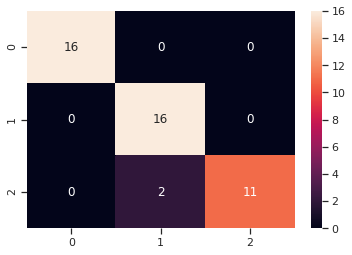

In [21]:
# importing the modules
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# providing actual and predicted values
cm = confusion_matrix(y_test, GB_predict)

# If True, write the data value in each cell
sns.heatmap(cm,annot=True)

# saving confusion matrix in png form
plt.savefig('confusion_Matrix.png')

In [22]:
# importint the module
from sklearn.metrics import classification_report

# printing the report
print(classification_report(y_test, GB_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.89      1.00      0.94        16
           2       1.00      0.85      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

